<a href="https://colab.research.google.com/github/Patortiz26/IN6531-Miner-a-de-datos-2021-2/blob/main/Aux5_IN6531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Auxiliar 5 - IN6531
**Autor: Patricio Ortiz**

##Regresión

En una tarea de **aprendizaje supervisado**, por lo tanto existe un valor conocido que sabemos es "real". Se define a la regresión como un proceso estadístico realizado para estimar las relaciones entre variables.

De forma un poco más "matematica" se busca aproximar una función (f) que calcule a partir de los features de input (X) el valor de la variable a determinar (y). La diferencia "fundamental" con clasificación es que en este caso buscamos la predicción de una variable entera.

En la clase de hoy revisaremos distintos modelos de regresión.

##Validación de regresores.

Para la validación de los modelos de regresión, existen diversas métricas que sirven para evaluar la calidad de los resultados:
* MAE (mean absolute error)
* MAPE (mean absolute percentage error)
* MdRAE (mean relative absolute error)
* MASE (mean absolute  scaled error)

links:
* [Distintas métricas para predicciones enteras](https://towardsdatascience.com/time-series-forecast-error-metrics-you-should-know-cc88b8c67f27) 


##Exploración de datos

Hoy trabajaremos con datos de vino

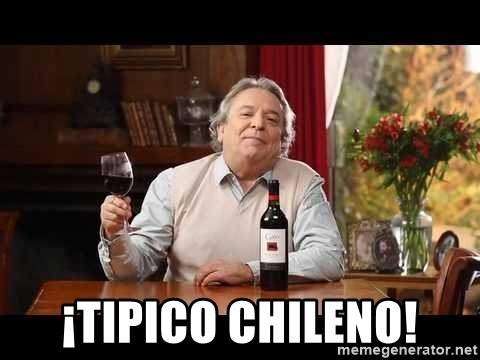

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #tambien pueden usarse otras formas revisen robustscaler y minmaxscaler

In [ ]:
#Lectura de datos
df = pd.read_csv('https://raw.githubusercontent.com/Patortiz26/IN6531-Miner-a-de-datos-2021-2/main/red-wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Forma del dataframe
df.shape

(1599, 12)

In [ ]:
#Analizar na's
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#Tipo de valores por columna
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
#Numero de valores distintos por columna
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

Como todos los valores son númericos podemos hacer un boxplot.

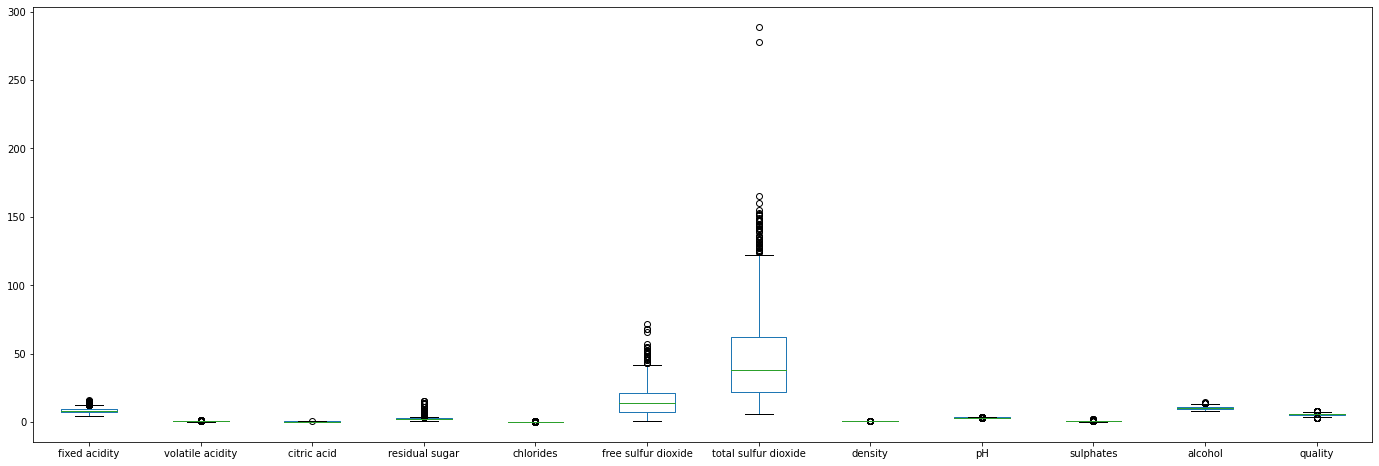

In [ ]:
#Boxplot general
df.plot(kind='box',figsize=(24,8))

Ahora, con dicha información podriamos ver los boxplot por tipo de calidad

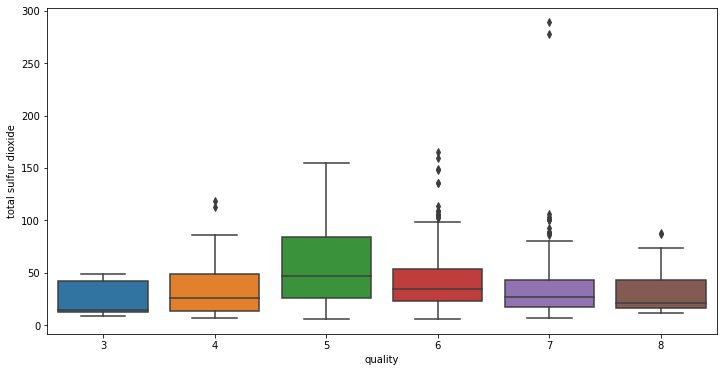

In [ ]:
#Boxplot para ver variable con mayor dispersión
plt.figure(figsize=(12,6))

sns.boxplot(data=df,x='quality', y='total sulfur dioxide')

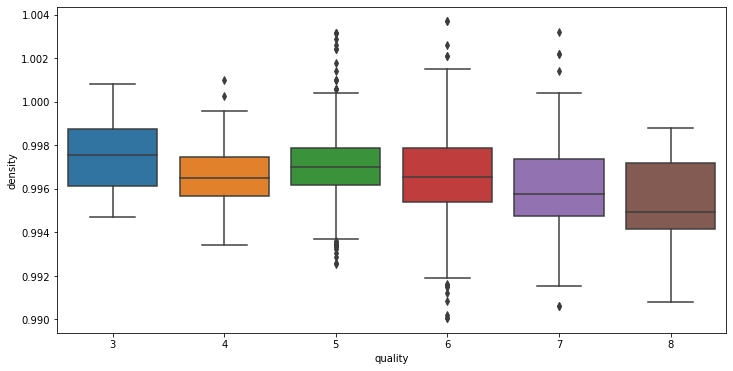

In [ ]:
#Boxplot para ver variable con mayor número de valores distintos.
plt.figure(figsize=(12,6))

sns.boxplot(data=df,x='quality', y='density')

Visualizamos a su vez, un heatmap.

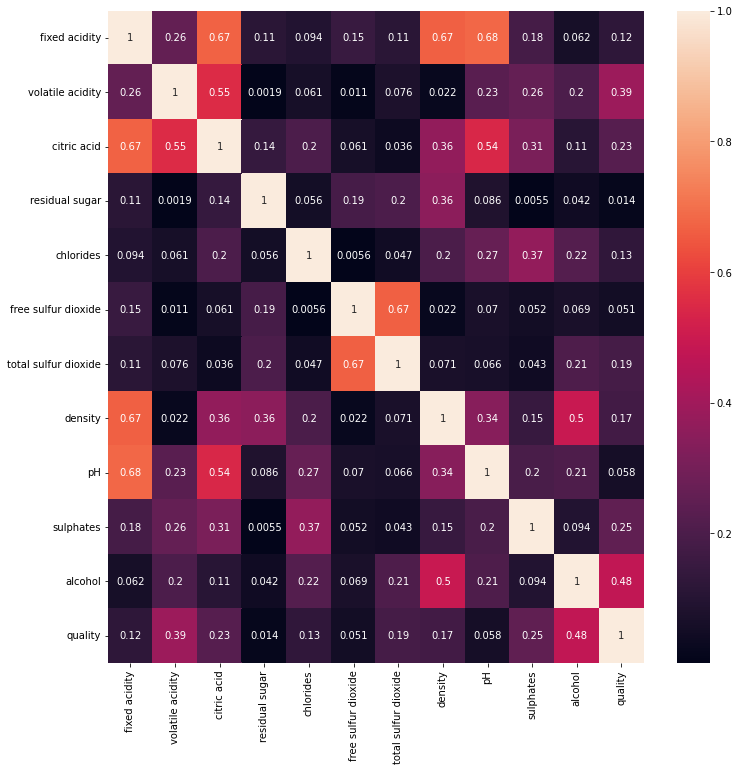

In [ ]:
plt.figure(figsize=(12,12))

corr = df.corr()
sns.heatmap(corr.abs(), xticklabels= corr.columns.values, yticklabels= corr.columns.values, annot=True)

Ahora separamos en X e y. Luego separamos los datos de train y test.

In [ ]:
#Separamos x e y
X = df.drop(columns=['quality'])
y = df.loc[:,['quality']]

#Dividimos en X e y
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 12345)

##Regresor 1: Linear Regressor

El modelo de regresión lineal es el más simple de todos, por ello veremos primero como ocuparlo

In [ ]:
#importamos las métricas de desempeño MAE y MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
#importamos modelo
from sklearn.linear_model import LinearRegression

#definicion del modelo a utulizar (segun libreria sklearn)
model = LinearRegression()

#entregar los datos de entrenamiento para el modelo definido
model.fit(X_train,y_train)

#obtener los valores estimados para el modelo
predictions_in_sample = model.predict(X_train)
predictions_out_of_sample = model.predict(X_test)


#train metrics
Error_absoluto_medio_entrenamiento_MAE_ = mean_absolute_error(y_pred= predictions_in_sample, y_true= y_train) 
Error_porcentual_medio_entrenamiento_MAPE = np.mean(np.abs((y_train - predictions_in_sample) / y_train)) * 100
Error_cuaratico_medio_entrenamiento_RMSE = np.sqrt(mean_squared_error(y_pred=predictions_in_sample, y_true= y_train))

#test metrics
Error_absoluto_medio_validacion_MAE = mean_absolute_error(y_pred= predictions_out_of_sample, y_true= y_test) 
Error_porcentual_medio_validacion_MAPE = np.mean(np.abs((y_test - predictions_out_of_sample) / y_test)) * 100
Error_cuaratico_medio_validacion_RMSE = np.sqrt(mean_squared_error(y_pred=predictions_out_of_sample, y_true= y_test))

print(('Error absoluto dentro de muestra: {}').format(Error_absoluto_medio_entrenamiento_MAE_))
print(('Error porcentual dentro de muestra: {}').format(Error_porcentual_medio_entrenamiento_MAPE[0]))
print(('Error cuadratico dentro de muestra: {}').format(Error_cuaratico_medio_entrenamiento_RMSE))
print(' ')
print(('Error absoluto fuera de muestra: {}').format(Error_absoluto_medio_validacion_MAE))
print(('Error porcentual fuera de muestra: {}').format(Error_porcentual_medio_validacion_MAPE[0]))
print(('Error cuadratico fuera de muestra: {}').format(Error_cuaratico_medio_validacion_RMSE))

Error absoluto dentro de muestra: 0.4924323783997819
Error porcentual dentro de muestra: 8.995216796297479
Error cuadratico dentro de muestra: 0.6361314854463609
 
Error absoluto fuera de muestra: 0.5322524221223156
Error porcentual fuera de muestra: 9.949762560868814
Error cuadratico fuera de muestra: 0.6864939777263189


De manera similar a los clasificadores, con el método **fit** entrenamos el regresor con los datos de <b>X</b> y el valor asociado a cada observación **y**. Para ver qué tan bien fue el entrenamiento, realizamos el print de las métricas de desempeño.

Como comentario, también puede utilizarse un método **predict** para predecir una nueva observación.

##Validación de train-test

Potencialmente, el método `train_test_split` nos puede dar una asignación "incorrecta". Por lo cual nos gustaría probar distintos "sets" de entrenamiento y prueba.

<img src="https://miro.medium.com/max/700/1*nJpZx7aeOaeC5AMbO1HHqg.jpeg">


Visualmente, esto es lo que realiza el K-Fold Cross Validation

<img src="https://miro.medium.com/max/700/1*vAzt64N5yJNOwn5DEGXWjg.jpeg">

link: https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12

In [ ]:
#Metodos de cross-validation y k-fold
from sklearn.model_selection import KFold, cross_validate

In [ ]:
#version manual
kf5 = KFold(n_splits= 5, shuffle=True)
i=1
for train_index, test_index in kf5.split(df):
    X_train_cv = X.iloc[train_index]
    X_test_cv = X.iloc[test_index]
    y_train_cv = y.iloc[train_index]
    y_test_cv = y.iloc[test_index]

    model.fit(X_train_cv, y_train_cv) #Training the model
    print(f"MAE for the fold no. {i} on the test set: {mean_absolute_error(y_test_cv, model.predict(X_test_cv))}")
    i+=1

MAE for the fold no. 1 on the test set: 0.48385168327848527
MAE for the fold no. 2 on the test set: 0.5105941303061201
MAE for the fold no. 3 on the test set: 0.5221634196937327
MAE for the fold no. 4 on the test set: 0.47764319043804704
MAE for the fold no. 5 on the test set: 0.5263101327991352


In [ ]:
for i,score in enumerate(cross_validate( model,X,y, scoring=['neg_mean_absolute_error'] , cv=5)['test_neg_mean_absolute_error']):
    print(f'MAE for the fold N {i} on the test: {score*-1}')

MAE for the fold N 0 on the test: 0.5226070584412954
MAE for the fold N 1 on the test: 0.5258644325807103
MAE for the fold N 2 on the test: 0.4996396241631319
MAE for the fold N 3 on the test: 0.5069421360247568
MAE for the fold N 4 on the test: 0.4969746399412768


##Distribución de los errores

Se debe tener en mente que SIEMPRE los modelos tendrán un error. Ahora bien, hay dos factores a tomar en consideración ¿cuanto me estoy equivocando? y ¿como me estoy equivocando?.

Para la primera pregunta, tenemos las métricas de desempeño. Ahora bien... ¿y para el como? Para eso tenemos que ver cómo distribuye el error

In [ ]:
#importamos librería útil para ver la distribución
from scipy import stats

In [ ]:
#calculamos el error que hay dentro de ambos sets
train_errors = y_train.values - predictions_in_sample
test_errors = y_test.values - predictions_out_of_sample

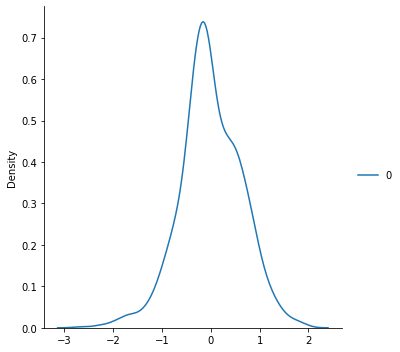

In [ ]:
# vemos la distribución de los errores de forma gráfica
sns.displot(train_errors, kind='kde')

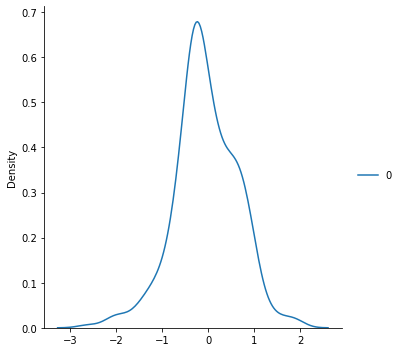

In [ ]:
# vemos la distribución de los errores de forma gráfica
sns.displot(test_errors, kind='kde')

((array([-3.26787148, -3.00794457, -2.86322802, ...,  2.86322802,
          3.00794457,  3.26787148]),
  array([-2.67839621, -2.36040695, -2.22576336, ...,  1.86628747,
          1.86628747,  1.94516208])),
 (0.6346794410104424, -6.3921781282253935e-15, 0.9954836347357219))

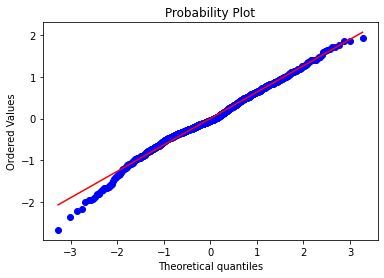

In [ ]:
stats.probplot(train_errors[:,0], dist="norm", plot=plt)

((array([-2.85324816, -2.55879241, -2.39222608, -2.27361071, -2.18033981,
         -2.10289257, -2.03632192, -1.97771454, -1.92520434, -1.87752132,
         -1.83376048, -1.79325327, -1.75549125, -1.72007838, -1.68669989,
         -1.65510129, -1.62507381, -1.59644394, -1.56906587, -1.54281582,
         -1.51758778, -1.49329024, -1.46984364, -1.44717832, -1.42523298,
         -1.40395334, -1.3832911 , -1.36320312, -1.34365065, -1.32459878,
         -1.30601593, -1.28787344, -1.27014524, -1.25280748, -1.23583835,
         -1.2192178 , -1.2029274 , -1.18695012, -1.17127023, -1.15587313,
         -1.14074529, -1.1258741 , -1.11124782, -1.09685548, -1.08268683,
         -1.06873226, -1.05498276, -1.04142986, -1.02806561, -1.01488249,
         -1.00187343, -0.98903176, -0.97635114, -0.96382561, -0.9514495 ,
         -0.93921743, -0.9271243 , -0.91516526, -0.90333569, -0.8916312 ,
         -0.88004761, -0.86858091, -0.8572273 , -0.84598313, -0.83484491,
         -0.82380931, -0.81287314, -0.

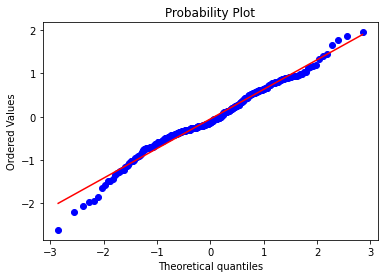

In [ ]:
stats.probplot(test_errors[:,0], dist="norm", plot=plt)

Un error distribuido de forma normal se vería tipicamente de la siguiente manera:


<img src="https://miro.medium.com/max/808/1*JjBKqmoJyZSfnmTROqhfog.png">

Por lo que estamos en un caso "simple"

Ahora bien, existen casos en los que nuestros errores no distribuyen de manera normal:

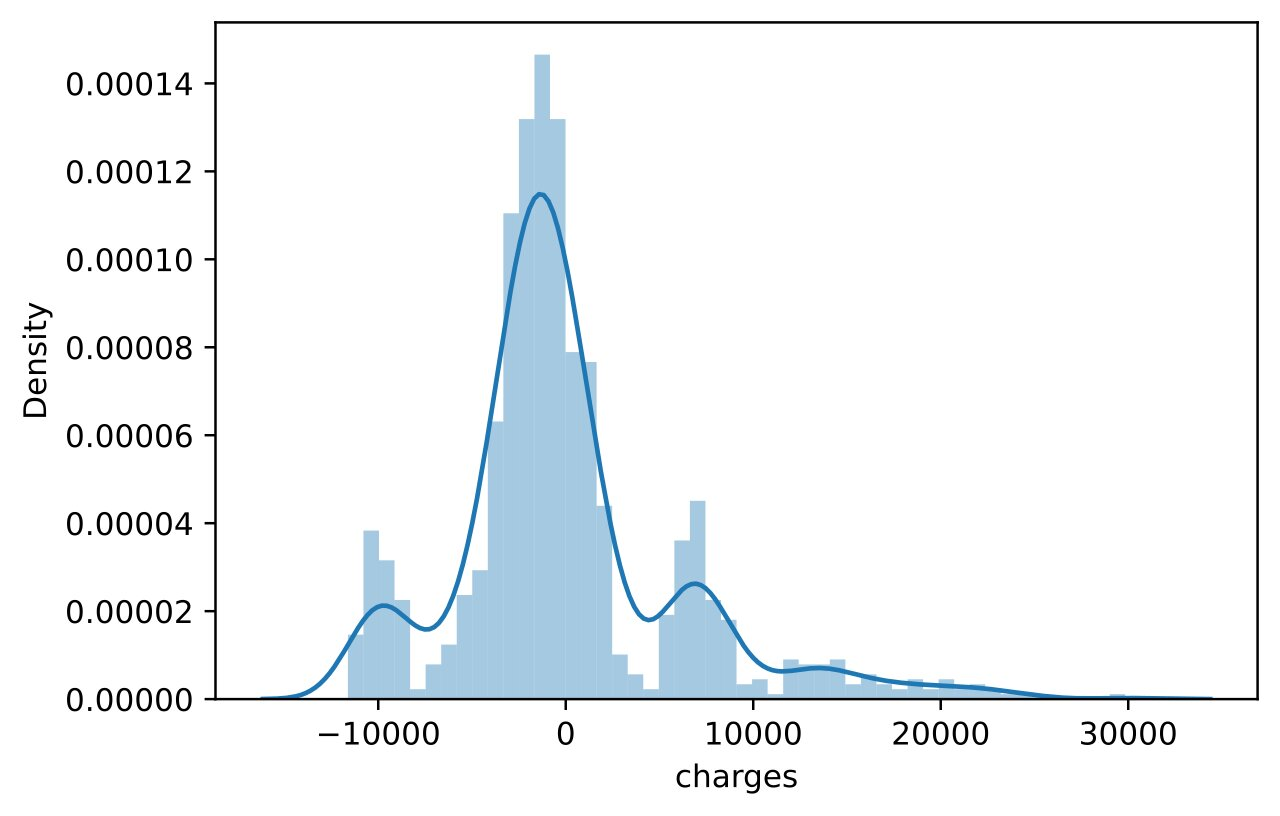

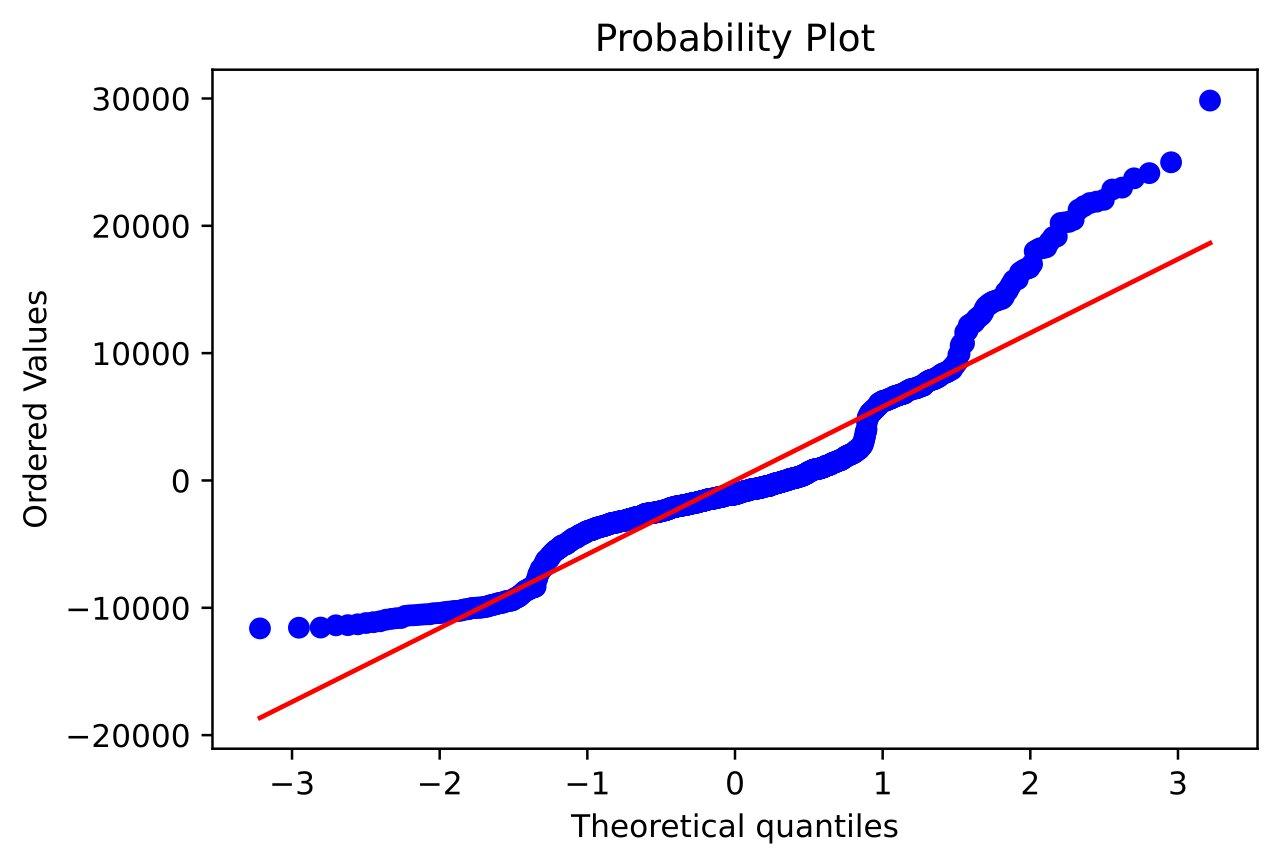

En los casos anteriores vemos como tenemos que el error distribuye de forma que acumula muchos errores en el lado "positivo" y en el lado "negativo". Podríamos tener casos de uso en los que queramos reducir alguno de dichos errores o en los que incluso sacrifiquemos precisión para disminuir cierto tipo de error.

Para más información visiten: https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0

##Regresor [2-n]

Aplicar el resto de los regresores es realmente similar a lo anterior, por lo que a continuación veremos como implementarlos de manera iterativa (con un for)

In [ ]:
def run_regressors(model, X, y, num_tests=100):
    metrics_train = {'MAE': [], 'MAPE': [], 'RMSE': []}
    metrics_test  = {'MAE': [], 'MAPE': [], 'RMSE': []}
    
    for _ in range(num_tests):
      
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

        model = model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_test = model.predict(X_test)

        metrics_train['MAE'].append(mean_absolute_error(predictions_train, y_train) ) 
        metrics_train['MAPE'].append(np.mean(np.abs((y_train - predictions_train) / y_train)) * 100)
        metrics_train['RMSE'].append(np.sqrt(mean_squared_error(predictions_train, y_train)))

        metrics_test['MAE'].append(mean_absolute_error(predictions_test, y_test) ) 
        metrics_test['MAPE'].append(np.mean(np.abs((y_test - predictions_test) / y_test)) * 100)
        metrics_test['RMSE'].append(np.sqrt(mean_squared_error(predictions_test, y_test)))
    
    return metrics_train, metrics_test

In [ ]:
#Importamos modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

r0 = ('Linear Regressor', LinearRegression())
r1 = ("Decision Tree", DecisionTreeRegressor())
r2 = ("KNN", KNeighborsRegressor())
r3 = ("Support Vector Machines", SVR())
r4 = ("Random Forest", RandomForestRegressor(random_state=123))

regressors = [r0,r1,r2,r3,r4]

X_i = X.values
y_i = y.values
y_i = y_i.reshape(1599, )

results_train = {}
results_test = {}
for name, model in regressors:
    metrics_train, metrics_test = run_regressors(model, X_i, y_i)
    results_train[name] = metrics_train
    results_test[name] = metrics_test
    print("----------------")
    print("Resultados para clasificador: ", name) 
    print("MAE promedio:", np.array(metrics_test['MAE']).mean())
    print("MAPE promedio:", np.array(metrics_test['MAPE']).mean())
    print("RMSE promedio:", np.array(metrics_test['RMSE']).mean())
    print("----------------\n\n")  

----------------
Resultados para clasificador:  Linear Regressor
MAE promedio: 0.5069568748969918
MAPE promedio: 9.296680676811569
RMSE promedio: 0.6534651882668855
----------------


----------------
Resultados para clasificador:  Decision Tree
MAE promedio: 0.4768333333333333
MAPE promedio: 8.789957837301587
RMSE promedio: 0.8021595509946299
----------------


----------------
Resultados para clasificador:  KNN
MAE promedio: 0.5751708333333334
MAPE promedio: 10.520424107142858
RMSE promedio: 0.7544007435943639
----------------


----------------
Resultados para clasificador:  Support Vector Machines
MAE promedio: 0.5585449806893048
MAPE promedio: 10.373676744691618
RMSE promedio: 0.7398361621930127
----------------


----------------
Resultados para clasificador:  Random Forest Classifier
MAE promedio: 0.42574125
MAPE promedio: 7.831567013888889
RMSE promedio: 0.586166068618773
----------------




In [ ]:
metrics_mae={}
metrics_mape={}
metrics_rmse={}
for i in results_train.keys():
  metrics_mae[i] = {}
  metrics_mape[i] = {}
  metrics_rmse[i] = {}

  metrics_mae[i]['train'] = np.mean(results_train[i]['MAE'])
  metrics_mae[i]['test'] = np.mean(results_test[i]['MAE'])

  metrics_mape[i]['train'] = np.mean(results_train[i]['MAPE'])
  metrics_mape[i]['test'] = np.mean(results_test[i]['MAPE'])

  metrics_rmse[i]['train'] = np.mean(results_train[i]['RMSE'])
  metrics_rmse[i]['test'] = np.mean(results_test[i]['RMSE'])

In [ ]:
names = [i for i in metrics_mae.keys()]
test_mae = [metrics_mae[i]['test'] for i in metrics_mae.keys()]
train_mae = [metrics_mae[i]['train'] for i in metrics_mae.keys()]


test_mape = [metrics_mape[i]['test'] for i in metrics_mae.keys()]
train_mape = [metrics_mape[i]['train'] for i in metrics_mae.keys()]

test_rmse = [metrics_rmse[i]['test'] for i in metrics_mae.keys()]
train_rmse = [metrics_rmse[i]['train'] for i in metrics_mae.keys()]

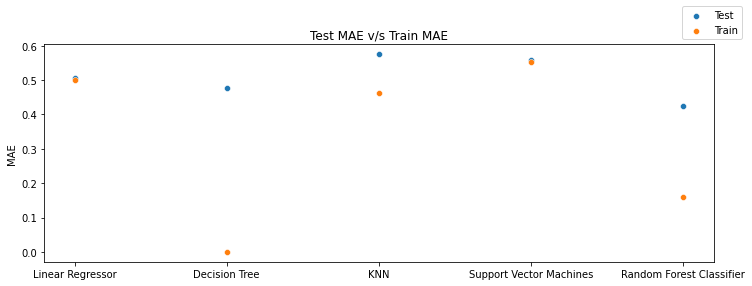

In [ ]:
plt.figure(figsize=(12,4))

sns.scatterplot(x=names, y=test_mae, label='Test')
sns.scatterplot(x=names, y=train_mae, label='Train')
plt.legend(loc='lower right', bbox_to_anchor=(1.05, 1))
plt.title('Test MAE v/s Train MAE')
plt.ylabel('MAE')
plt.show()

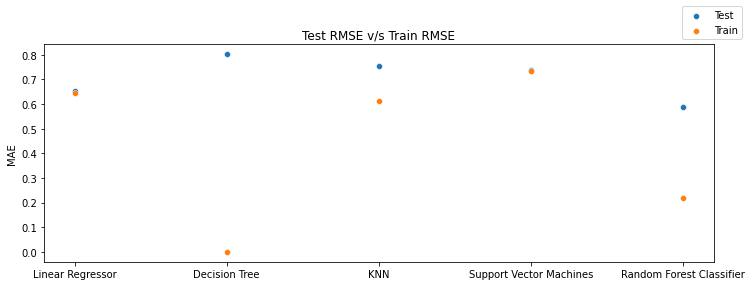

In [ ]:
plt.figure(figsize=(12,4))

sns.scatterplot(x=names, y=test_rmse, label='Test')
sns.scatterplot(x=names, y=train_rmse, label='Train')
plt.legend(loc='lower right', bbox_to_anchor=(1.05, 1))
plt.title('Test RMSE v/s Train RMSE')
plt.ylabel('MAE')
plt.show()

##Encontrar hiper párametros

Los hiperparámetros son parámetros que no se aprenden directamente dentro de los estimadores. En scikit-learn se pasan como argumentos al constructor de las clases, por ejemplo cuál kernel usar para Support Vector Regressor, o qué criterio para Decision Tree, etc. Es posible y recomendable buscar en el espacio de hiperparámetros la mejor alternativa.

Tenga en cuenta que es común que un pequeño subconjunto de esos parámetros pueda tener un gran impacto en el rendimiento predictivo o de cálculo del modelo, mientras que otros pueden dejar sus valores predeterminados. Se recomienda leer la documentación de la clase de estimador para obtener una mejor comprensión de su comportamiento esperado.

###GridSearchCV

Una alternativa para seleccionar hiperparámetros es GridSearchCV, la cual considera exhaustivamente todas las combinaciones de parámetros. GridSearchCV recibe un *estimador*, recibe *param_grid* (un diccionario o una lista de diccionarios con los nombres de los parametros a probar como keys y una lista de los valores a probar), *scoring* una o varias funciones de puntuación (score) para evaluar cada combinación de parametros (opciones válidas: https://scikit-learn.org/stable/modules/model_evaluation.html) y *cv* una extrategia para hacer validación cruzada.

El siguiente código muestra cómo seleccionar el número de vecinos y qué pesos otorgar a los vecinos en un regresor KNN. 

In [ ]:
help(KNeighborsRegressor)

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_i, y_i, test_size=.30)

#Configure tuned_parameters
tuned_parameters = {'n_neighbors': [1, 3, 5, 10], 
                    'weights': ['uniform','distance']}

#set scoring metric
score = 'neg_mean_absolute_error' 

#Construir el clf con GridSearch
model = GridSearchCV(KNeighborsRegressor(), 
                   param_grid=tuned_parameters, 
                   cv=5,
                   scoring=score)

#Entrenar clf
model.fit(X_train, y_train)

print("Mejor combinación de parámetros:")
print(model.best_params_)

Mejor combinación de parámetros:
{'n_neighbors': 10, 'weights': 'distance'}


In [ ]:
results_train_2 = {}
results_test_2 = {}

metrics_train_2, metrics_test_2 = run_regressors(model, X_i, y_i)
results_train_2[name] = metrics_train
results_test_2[name] = metrics_test
print("----------------")
print("Resultados para clasificador: ", name) 
print("MAE promedio:", np.array(metrics_test_2['MAE']).mean())
print("MAPE promedio:", np.array(metrics_test_2['MAPE']).mean())
print("RMSE promedio:", np.array(metrics_test_2['RMSE']).mean())
print("----------------\n\n")  

----------------
Resultados para clasificador:  Random Forest Classifier
MAE promedio: 0.4680909477398773
MAPE promedio: 8.66569489913292
RMSE promedio: 0.6823563251569822
----------------


